## Group No - 20

## Group Member Names:
1. Varinder Singh - 2021fc04070@wilp.bits-pilani.ac.in
2. Bandaru Raja Sekhar - 2021fc04074@wilp.bits-pilani.ac.in
3. Mikhil P.A. - 2021fc04326@wilp.bits-pilani.ac.in

# 1. Problem Statement
 
Students are expected to identify a classification / regression problem of your choice. You have to detail the problem under this heading which basically addresses the following questions.
 
   1. What is the problem that you are trying to solve?
   2. What kind of prediction (classification / regression) task are you performing?

ENSURE THAT YOU ARE USING NUMERICAL / CATEGORICAL DATA only.

DO NOT use images or textual data.

Score: 1 Mark in total (0.5 mark each)

### 1. Problem Statement

- Diabetes, also known as diabetes mellitus, is a group of metabolic disorders characterized by a high blood sugar level (hyperglycemia) over a prolonged period of time. 
- Symptoms often include frequent urination, increased thirst and increased appetite. If left untreated, diabetes can cause many health complications.
- Diabetes is occurred due to either the pancreas not producing enough insulin, or the cells of the body not responding properly to the insulin produced. Insulin is a hormone which is responsible for helping glucose from food get into cells to be used for energy.
- The Diabetes Analysis helps to understand the chance of occurrence of diabetes in persons based on varied health conditions/situations.
- The performance of these data mining techniques is measured by combining the results of predictive accuracy, ROC curve and AUC value using a standard data set as well as a collected data set.

#### - Objective
To predict whether a patient has diabetes or not. This is a binary outcome.
- Positive (+) = 1, 1 is interpreted as "tested positive for diabetes"
- Negative (-) = 0, 0 is interpreted as "tested negative for diabetes"


### 2. Kind of prediction

- In this assignment, the risk factors that causes diabetes disease is considered and predicted using classification algorithm.

# 2. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Download the data directly



#### About the Dataset:
- The data has been taken from Kaggle of Diabetes Dataset. <br>
Link: https://www.kaggle.com/datasets/mathchi/diabetes-data-set/download?datasetVersionNumber=1

- Number of Instances: 768
- Number of Attributes: 8 plus class

For Each Attribute: (all numeric-valued)
- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skin fold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)
- Class variable (0 or 1)
    - 1 is interpreted as "tested positive for diabetes"
    - 0 is interpreted as "tested negative for diabetes"

## 2.2 Code for converting the above downloaded data into a form suitable for DL 

In [31]:
import numpy as np
import pandas as pd
dataset = pd.read_csv("diabetes.csv")

In [32]:
# Displaying a sample of data present in the dataframe "dataset"
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2.3 Write your observations from the above. 

1. Size of the dataset
2. What type of data attributes are there?

Score: 2 Mark

#### 1. Shape of the Dataset is (768, 9)
- There are total of 768 records with 9 columns

#### 2. Data Attributes
- All the attributes have numeric data type.
1. Pregnancies - int
2. Glucose - int
3. BloodPressure - int
4. SkinThickness - int
5. Insulin - int
6. BMI - float
7. DiabetesPedigreeFunction - float
8. Age - int
9. Outcome - int(0,1)

In [33]:
print("Dataset Shape:", dataset.shape, "\n")
dataset.info()

Dataset Shape: (768, 9) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# 3. Data Preparation

Perform the data prepracessing that is required for the data that you have downloaded. 

## 3.1 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies

IF ANY

In [34]:
# Checking Null values
print(dataset.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


#### --> No null values were found in any columns of diabetes dataset.

In [35]:
#Looking for any duplicate rows in the dataset
print( "Number of duplicate rows found in the dataset: " , 
      len(dataset.loc[dataset.duplicated(), :]) )

Number of duplicate rows found in the dataset:  0


#### --> No duplicate rows were found in the diabetes dataset.

### Visualization on Class imbalance

Minority class [1] is ~55%, so the class imbalance is mild. This slight imbalance is often not a concern, and the problem can often be treated like a normal classification predictive modeling problem. Therefore, we will not take any action.

<AxesSubplot:xlabel='Outcome', ylabel='count'>

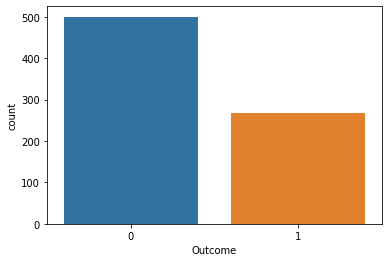

In [36]:
import seaborn as sns

sns.countplot(x=dataset.Outcome)

<AxesSubplot:>

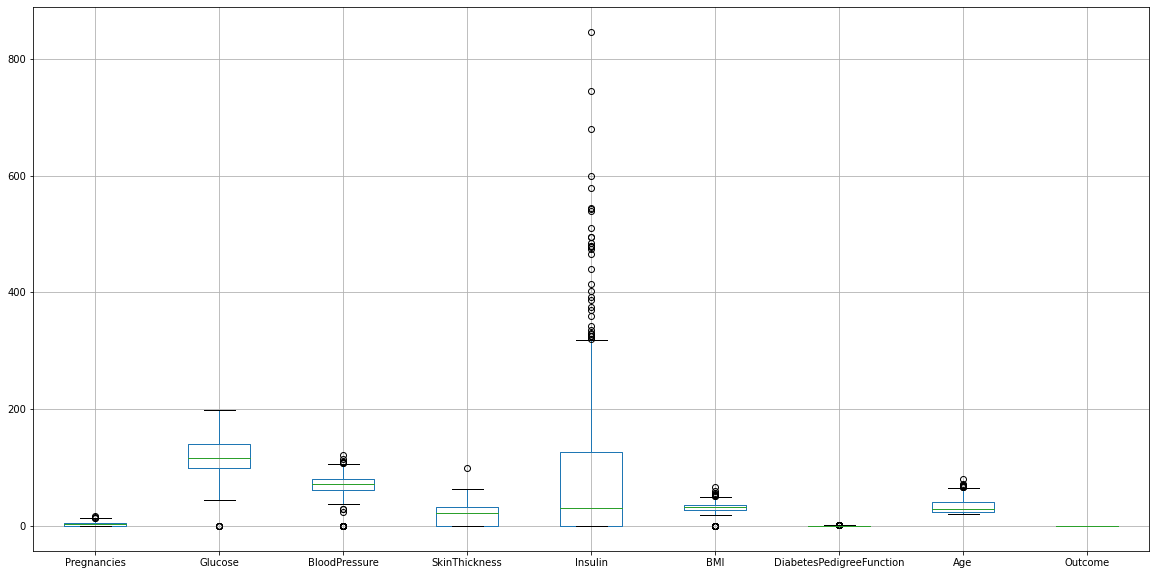

In [37]:
col = list(dataset.columns)
dataset.boxplot(figsize = (20,10), column = col)

### Handling the Outliers 

**Winsorization of Outliers** is the process of replacing the extreme values of statistical data in order to limit the effect of the outliers on the calculations or the results obtained by using that data. 

In [38]:

for i in col:
    percentile25 = dataset[str(i)].quantile(0.25)
    percentile75 = dataset[str(i)].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    dataset[str(i)] = np.where(dataset[str(i)] >= upper_limit,
                                    upper_limit,
                                        np.where(dataset[str(i)] <= lower_limit,
                                        lower_limit,
                                            dataset[str(i)]
                                        )
                                    )

<AxesSubplot:>

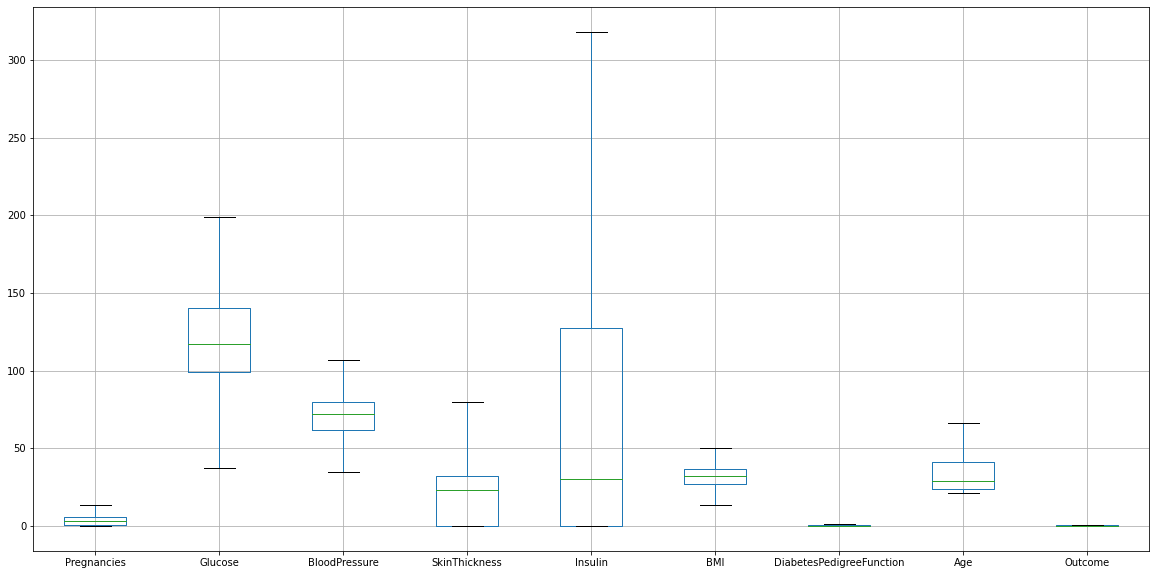

In [39]:
dataset.boxplot(figsize = (20,10), column = col)

## 3.2 Encode categorical data

#### --> No categorical data present in the dataset(X).
#### --> Only numeric data present in the dataset apart from the Target attribute having (0,1) value.

## 3.3 Normalize the data

In [40]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

dataset['Pregnancies'] = sc.fit_transform(dataset['Pregnancies'].values.reshape(-1, 1))
dataset['Glucose'] = sc.fit_transform(dataset['Glucose'].values.reshape(-1, 1))
dataset['BloodPressure'] = sc.fit_transform(dataset['BloodPressure'].values.reshape(-1, 1))
dataset['SkinThickness'] = sc.fit_transform(dataset['SkinThickness'].values.reshape(-1, 1))
dataset['Insulin'] = sc.fit_transform(dataset['Insulin'].values.reshape(-1, 1))
dataset['BMI'] = sc.fit_transform(dataset['BMI'].values.reshape(-1, 1))
dataset['DiabetesPedigreeFunction'] = sc.fit_transform(dataset['DiabetesPedigreeFunction'].values.reshape(-1, 1))
dataset['Age'] = sc.fit_transform(dataset['Age'].values.reshape(-1, 1))

In [41]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.444444,0.684942,0.513889,0.4375,0.000000,0.544355,0.489305,0.637363,1.0
1,0.074074,0.295753,0.430556,0.3625,0.000000,0.356183,0.243316,0.219780,0.0
2,0.592593,0.901158,0.402778,0.0000,0.000000,0.267473,0.529412,0.241758,1.0
3,0.074074,0.320463,0.430556,0.2875,0.295481,0.396505,0.079323,0.000000,0.0
4,0.000000,0.616988,0.069444,0.4375,0.528094,0.799731,1.000000,0.263736,1.0
...,...,...,...,...,...,...,...,...,...
763,0.740741,0.394595,0.569444,0.6000,0.565815,0.525538,0.082888,0.923077,0.0
764,0.148148,0.524324,0.486111,0.3375,0.000000,0.630376,0.233512,0.131868,0.0
765,0.370370,0.518147,0.513889,0.2875,0.352063,0.345430,0.148841,0.197802,0.0
766,0.074074,0.549035,0.347222,0.0000,0.000000,0.450269,0.241533,0.571429,1.0


In [42]:
# Displaying a sample of all the attributes of the dataset
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.444444,0.684942,0.513889,0.4375,0.000000,0.544355,0.489305,0.637363,1.0
1,0.074074,0.295753,0.430556,0.3625,0.000000,0.356183,0.243316,0.219780,0.0
2,0.592593,0.901158,0.402778,0.0000,0.000000,0.267473,0.529412,0.241758,1.0
3,0.074074,0.320463,0.430556,0.2875,0.295481,0.396505,0.079323,0.000000,0.0
4,0.000000,0.616988,0.069444,0.4375,0.528094,0.799731,1.000000,0.263736,1.0


## 3.4 Feature Engineering 

if any

#### --> No Feature engineering required with the dataset. The dataset is self explanatory. 

## 3.5 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.


In [43]:
y = dataset.Outcome
X = dataset.copy().drop(['Outcome'],axis=1) 

In [44]:
# Displaying a sample of attributes of the dataset without the Target attribute
display(X.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.444444,0.684942,0.513889,0.4375,0.000000,0.544355,0.489305,0.637363
1,0.074074,0.295753,0.430556,0.3625,0.000000,0.356183,0.243316,0.219780
2,0.592593,0.901158,0.402778,0.0000,0.000000,0.267473,0.529412,0.241758
3,0.074074,0.320463,0.430556,0.2875,0.295481,0.396505,0.079323,0.000000
4,0.000000,0.616988,0.069444,0.4375,0.528094,0.799731,1.000000,0.263736


In [45]:
# Displaying a sample of Target attribute
print(y.head())

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64


In [46]:
print("Shape of X: ",X.shape)
print("Shape of y: ",y.shape)

Shape of X:  (768, 8)
Shape of y:  (768,)


## 3.6 Split the data into training set and testing set

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

## 3.7 Report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 
* to encode categorical data 
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset

Score: 3 Marks

#### 1. No duplicate data(record) was found in the dataset. We used duplicated() function to find any duplicates in the dataset. This was used because dataframe has the functions in-built and are easy and fast to implement and get the result easily.
   
#### 2. No missing data was found in the dataset. We used isnull() function to find any null values in every column present in the dataset. This was used because dataframe has the functions in-built and are easy and fast to implement and get the result easily.
   
#### 3. There were outliers present in given dataset. We used boxplot to identify outliers and plot all the data points in every column. In order to rectify the outliers, we used Winsorization of outliers. In this, we replaced the extreme values of statistical data in order to limit the effect of the outliers on the calculations or the results obtained by using that data. We used this because it preserves the information that a case had among the highest (or lowest) values in a distribution but protects against some of the harmful effects of outliers.
   
#### 4. No categorical data was present in dataset. Therefore, no action was taken.
   
#### 5. For normalisation, we used MinMaxScaler(). We used this because MinMaxScaler() preserves the shape of the original distribution. It doesn't meaningfully change the information embedded in the original data. Note that MinMaxScaler doesn't reduce the importance of outliers; but outliers have been handled separately as mentioned above. The range for the feature returned by MinMaxScaler() is 0 to 1.

In [48]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (614, 8)
Shape of y_train:  (614,)
Shape of X_test:  (154, 8)
Shape of y_test:  (154,)


# 4. Deep Neural Network Architecture


## 4.1 Design the architecture that you will be using to solve the prediction problem identified.

* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [49]:
import tensorflow as tf
from keras.models import Sequential
from keras import layers
from tensorflow.keras import regularizers

In [50]:
# Number of features
input_dim = X_train.shape[1]  

In [51]:
model = Sequential()
model.add(layers.Dense(16, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                144       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 4)                 36        
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


## 4.2 Report

Report the following and provide justification for the same.

* Number of layers
* Number of units in each layer
* Activation function used in each hidden layer
* Activation function used in the output layer
* Total number of trainable parameters 

Score: 4 Marks

#### 1. Number of layers
We choose to add total 5 layers which also includes one layer of drop out with coefficient 0.1 to our neural network because the dataset is not huge and it has only 768 records. Overall problem in hand is also not very complex with the given dataset; here we are dealing with 8 columns for training and 1 column as a Target. Therefore, 5 layers are efficient for our neural network.

#### 2. Number of units in each layer
We choose number of units in each layer as 16/8/4/1 along with one drop out with 0.1 coefficient before output layer in neural networks. Overall problem in hand is also not very complex with the given dataset; here we are dealing with 8 columns for training and 1 column as a Target. Therefore, number of units in each layer as 16/8/4/1 along with one drop out with 0.1 coefficient before output layer are efficient for our neural network.

#### 3. Activation function used in each hidden layer
We are using Rectified Linear Activation (ReLU) for hidden layers. This is because ReLU is computationally efficient because it is simple to calculate and does not require exponentiation computationa. Also, it has been shown to improve the convergence of stochastic gradient descent compared to other activation functions, which can make it faster to train deep neural networks. The ReLU function is non-linear, which is important for the representation of neural networks. The layer before the output layer, we have used Drop-out with 0.1 coefficient to streamline the data for output layer

#### 4. Activation function used in the output layer
We used sigmoid function in the output layer of a neural network as our goal is to predict a binary outcome(Diabetic or not). This is because the sigmoid function squashes the output of the neuron to a value between 0 and 1, which can be interpreted as a probability. 

#### 5. Total number of trainable parameters
The total number of trainable parameters is equal to the sum the number of trainable parameters in each layer of the neural network. The number of trainable parameters in a layer is the number of neurons in the layer times the number of inputs to each neuron plus the number of bias terms. <br>
In our case, we have **321** total number of trainable parameters.

# 5. Training the model

## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations


In [53]:
model.compile(
            loss='binary_crossentropy', 
            optimizer= tf.keras.optimizers.Adam(learning_rate=0.001) ,
            metrics=['accuracy'],
            )

## 5.2 Train the model

In [54]:
classifier_nn = model.fit(X_train,y_train,
                    epochs=400,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=20,
                )

#### Justify your choice of optimizers and regulizations used and the hyperparameters tuned

Score: 4 Marks

#### Optimizer
We used Adam(Adaptive Moment Estimation) as an optimiser because it is an extension of stochastic gradient descent that automatically tunes the learning rate for each parameter, making it faster and more efficient than standard gradient descent. It involves a combination of two gradient descent methodologies: AdaGrad and RMSProp. The results of the Adam optimizer are generally better than every other optimization algorithm, have faster computation time, and require fewer parameters for tuning. Because of all that, Adam is used as an optimizer for our case.

  
#### Regularizations
We used L2 regularization for our hidden layers as our regularizer because L2 tends to shrink coefficients evenly. L2 regularization distributes the weights for all layers by gaussian distribution and shrinks their norm to small values. L2 Regularization shrinks all the weights to small values, preventing the model from learning any complex concept with respect to any particular node/feature, preventing overfitting.


#### Hyperparameters 
Hyperparameters are parameters that are set before training a machine learning model. They are often specified by the practitioner who is training the model and control the behavior of the learning algorithm. Below are the hyperparameters used in our neural network:

- learning rate = 0.001 <br>
  
  This is because using 0.001 as a small learning rate allows the model to make small, precise updates to its weights, which can help the model converge on a good solution.

- L2 regularization coefficient for two hidden layers = 0.001 <br>
  
  This is because 0.001 coefficient scalar value is added to the loss function to prevent overfitting, which occurs when a model learns patterns in the training data that are not generalizable to new data.

- number of hidden layer = 3
  
  We chose 3 layers - 2 layers with ReLU and 1 layer with Dropout. 2 layers with ReLU is chose because it is computationally efficient as it only requires a simple comparison operation. It helps in getting the result quickly. 1 layer with Dropout is chosen because Dropout works by randomly dropping out, or setting to zero, a certain number of output features of a layer during training. This has the effect of reducing the complexity of the model, which can help prevent overfitting. 

- epochs = 400
  
  We chose 400 as epochs because it gives enough time to learn the underlying patterns in the data of given size of diabetes dataset(768, 9). It is also performance-wise optimal.

- batch_size = 20
  
  We chose batch_size as 20 because it efficiently converges the speed of the model. It also efficiently deals with the performance for getting the results.
  

# 6. Test the model

Score: 2 Marks

In [55]:
# Predict Labels
testLoss, testAccuracy = model.evaluate(X_test, y_test, verbose=0)

# Getting prediction from the model using X_test
Ypredicted = model.predict(X_test)
# Getting prediction from the model using X_train
Y_trainpredicted = model.predict(X_train)


for i in range(len(Ypredicted)):
    if Ypredicted[i]>0.5:
        Ypredicted[i]=1
    elif Ypredicted[i]<=0.5:
        Ypredicted[i]=0

for i in range(len(Y_trainpredicted)):
    if Y_trainpredicted[i]>0.5:
        Y_trainpredicted[i]=1
    elif Y_trainpredicted[i]<=0.5:
        Y_trainpredicted[i]=0

print("Test Loss: ", testLoss)
print("Test Accuracy: ", testAccuracy)

Test Loss:  0.4626012146472931
Test Accuracy:  0.7857142686843872


## 7. Conclusion 

Plot the training and validation loss
Report the testing accuracy and loss.

Report values for preformance study metrics like accuracy, precision, recall, F1 Score.

A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, MAE etc per the requirement of your application/problem.

Score 2 Marks

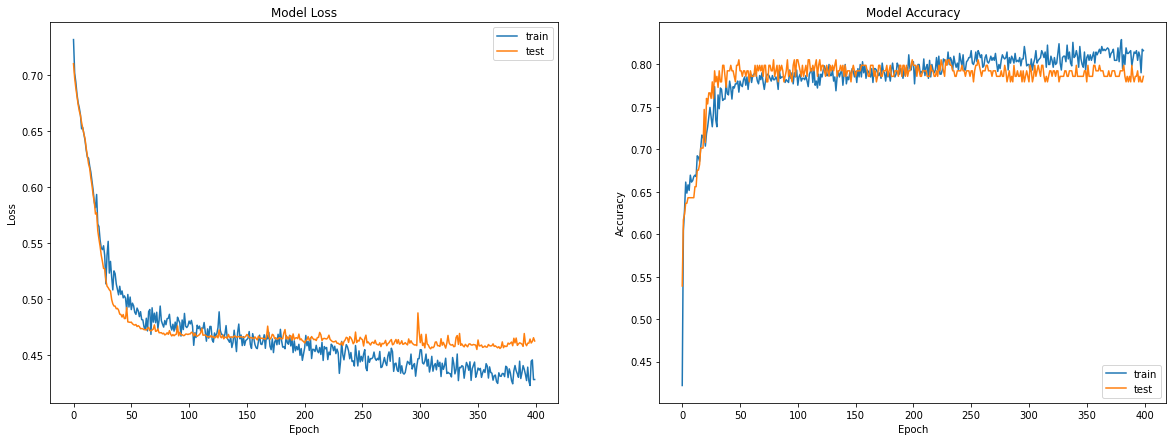

In [56]:
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(7)

plt.subplot(1,2,1)
plt.plot(classifier_nn.history['loss'], label='train')
plt.plot(classifier_nn.history['val_loss'], label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')


plt.subplot(1,2,2)
plt.title('Model Accuracy')
plt.plot(classifier_nn.history['accuracy'], label='train')
plt.plot(classifier_nn.history['val_accuracy'], label='test')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.show()

In [57]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


num_classes = 2

#target names
target_names = ["Class {}".format(i) for i in range(num_classes)]


# Confusion matrix
confusion_mtx = confusion_matrix(y_test, Ypredicted)
print('Confusion matrix = \n',confusion_mtx)

# Classification Report    
print('\nClassfication report = \n', classification_report(y_test, Ypredicted, target_names=target_names))

Confusion matrix = 
 [[82 17]
 [16 39]]

Classfication report = 
               precision    recall  f1-score   support

     Class 0       0.84      0.83      0.83        99
     Class 1       0.70      0.71      0.70        55

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def accuracy(y_pred, y_test):
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix : \n", cm, '\n')
    print("Accuracy Score : {0:.2f}%".format(accuracy_score(y_test, y_pred)*100))
    print("Precision : {0:.2f}".format(precision_score(y_test, y_pred)))
    print("Recall : {0:.2f}".format(recall_score(y_test, y_pred)))
    print("F1 Score : {0:.2f}".format(f1_score(y_test, y_pred)))

In [59]:
print("++++++++++++++++++\nTest Set Accuracy: \n++++++++++++++++++\n")
accuracy(Ypredicted, y_test)

++++++++++++++++++
Test Set Accuracy: 
++++++++++++++++++

Confusion Matrix : 
 [[82 17]
 [16 39]] 

Accuracy Score : 78.57%
Precision : 0.70
Recall : 0.71
F1 Score : 0.70


In [60]:
print("++++++++++++++++++\nTrain Set Accuracy: \n++++++++++++++++++\n")
accuracy(Y_trainpredicted, y_train)

++++++++++++++++++
Train Set Accuracy: 
++++++++++++++++++

Confusion Matrix : 
 [[345  56]
 [ 55 158]] 

Accuracy Score : 81.92%
Precision : 0.74
Recall : 0.74
F1 Score : 0.74


The performance can be measured using the percentage of accuracy observed in both data sets to conclude on the presence of overfitting. If the model performs better on the training set than on the test set, it means that the model is likely overfitting.

#### -> Accuracy of Training set is 81.92% and Accuracy for Test set is 78.57%. We could say that the neural network model is <u>SLIGHTLY OVER-FIT</u>.

## 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.

Score 2 Marks

1. The solution to solve the proposed problem is to predict diabetes disease for a patient in advance with the given health condition/history using the devised neural network. So that it is easier to diagnose the early offset of diabetes disease in patients and treat them in a timely manner or make necessary changes in one's life style so that the disease does not get worsened.
   
2. **Challenges** :
   - **Lack of sufficient and high-quality data:** One of the main challenges in using neural networks for predicting diabetes is the lack of sufficient and high-quality data. In order to train a neural network, we need large amounts of data that are accurately labeled and relevant to the task at hand. However, collecting and preparing such data can be difficult, time-consuming, and expensive.
   - **High complexity and computational expense:** Another challenge in using neural networks for predicting diabetes is the high complexity and computational expense of these models. Neural networks are highly complex, multi-layered models that require a lot of computational power to train and evaluate. This can make them difficult to use in practice, especially when dealing with large amounts of data.
   - **Privacy:** Collecting medical data can raise privacy concerns, as it may include sensitive personal information such as names, medical history, addresses, and financial information. This can make it difficult to balance the need for data with the need to protect individuals' privacy.
   
3. **Observation** :
   - **Neural networks can be highly effective at predicting diabetes:** One of the main observations when using neural networks for predicting diabetes is that these models can be highly effective at making accurate predictions. 
   - **The quality of the data is critical:** Another key observation when using neural networks for predicting diabetes is the importance of the quality of the data. In order to train effective neural network models, we need large amounts of high-quality data that is accurately labeled and relevant to the task at hand. If the data is of poor quality, the model will not be able to learn the necessary patterns and will not make accurate predictions. In our case, training data is small which giving accuracy around 75-80% to get higher accuracy, we need to get large dataset to train our neural network with balanced conditions.
   - **Overfitting:** Our neural network is slightly over-fit. Overfitting is a common problem in machine learning, and it can also be an issue when using neural networks for predicting diabetes. Overfitting occurs when a model is trained on a limited amount of data and becomes too specific to the training data, losing its ability to generalize to new data. This can lead to poor performance on unseen data, and it is important to take steps to prevent and detect overfitting when using neural networks.
   
4. **Decision made for Neural Networks** : 
   
   To find the optimal set of parameters that allow the network to make accurate predictions or decisions based on the input data. Hyperparameters are parameters that are set before training a machine learning model. They are often specified by the practitioner who is training the model and control the behavior of the learning algorithm. Below are the hyperparameters used in our neural network:

   - learning rate = 0.001 
   - L2 regularization coefficient for two hidden layers = 0.001
   - number of hidden layer = 3
   - epochs = 400
   - batch_size = 20

##NOTE
All Late Submissions will incur a penalty of -2 marks. So submit your assignments on time.

Good Luck